In [75]:
def tikz_convert(ax,
         clean = False, mktex = False, path = "", filename = "", caption = None):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)
        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "9cm")
    if caption:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\caption{{{caption}}}
\\end{{figure}}
```""")
    else:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None



def format_dataframe(df):
    
    def auto_format(number):
        if isinstance(number, (int, float)):
            if abs(number) >= 1000 or (abs(number) < 0.001 and number != 0):
                return f"{number:.3e}"  # Экспоненциальный формат
            else:
                return f"{number:.3f}"  # Обычный формат
        return str(number)  # Если это не число, оставляем как есть
    
    return df.applymap(auto_format)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline


V0 = (8.3 - 2)/152


N = [4,8,12,16,20,24,28,36,40,44,48,56,64,72,80,88,96,104,112,120,128,136,144,152]
V = [0,1,2]
for x in N: V.append(2+ V0*x)


pH = [2.54,2.71,3.00,3.17,3.28,3.41,3.60,3.95,5.15,5.86,6.12,6.32,6.48,
      6.58, 6.77, 6.96, 7.13, 7.31, 7.54, 7.84, 8.55, 10.34, 10.81, 11.05, 11.23, 11.35, 11.46]

df = {"k": [0,0,0,4,8,12,16,20,24,28,36,40,44,48,56,64,72,80,88,96,104,112,120,128,136,144,152],
      "V": V,
      "pH": pH
      }
df = pd.DataFrame(df)
V0

0.041447368421052636


```text
\begin{figure}[H]
\centering
[[Кривая титрования фосфорной кислоты.tex]]
\caption{Кривая титрования фосфорной кислоты}
\end{figure}
```


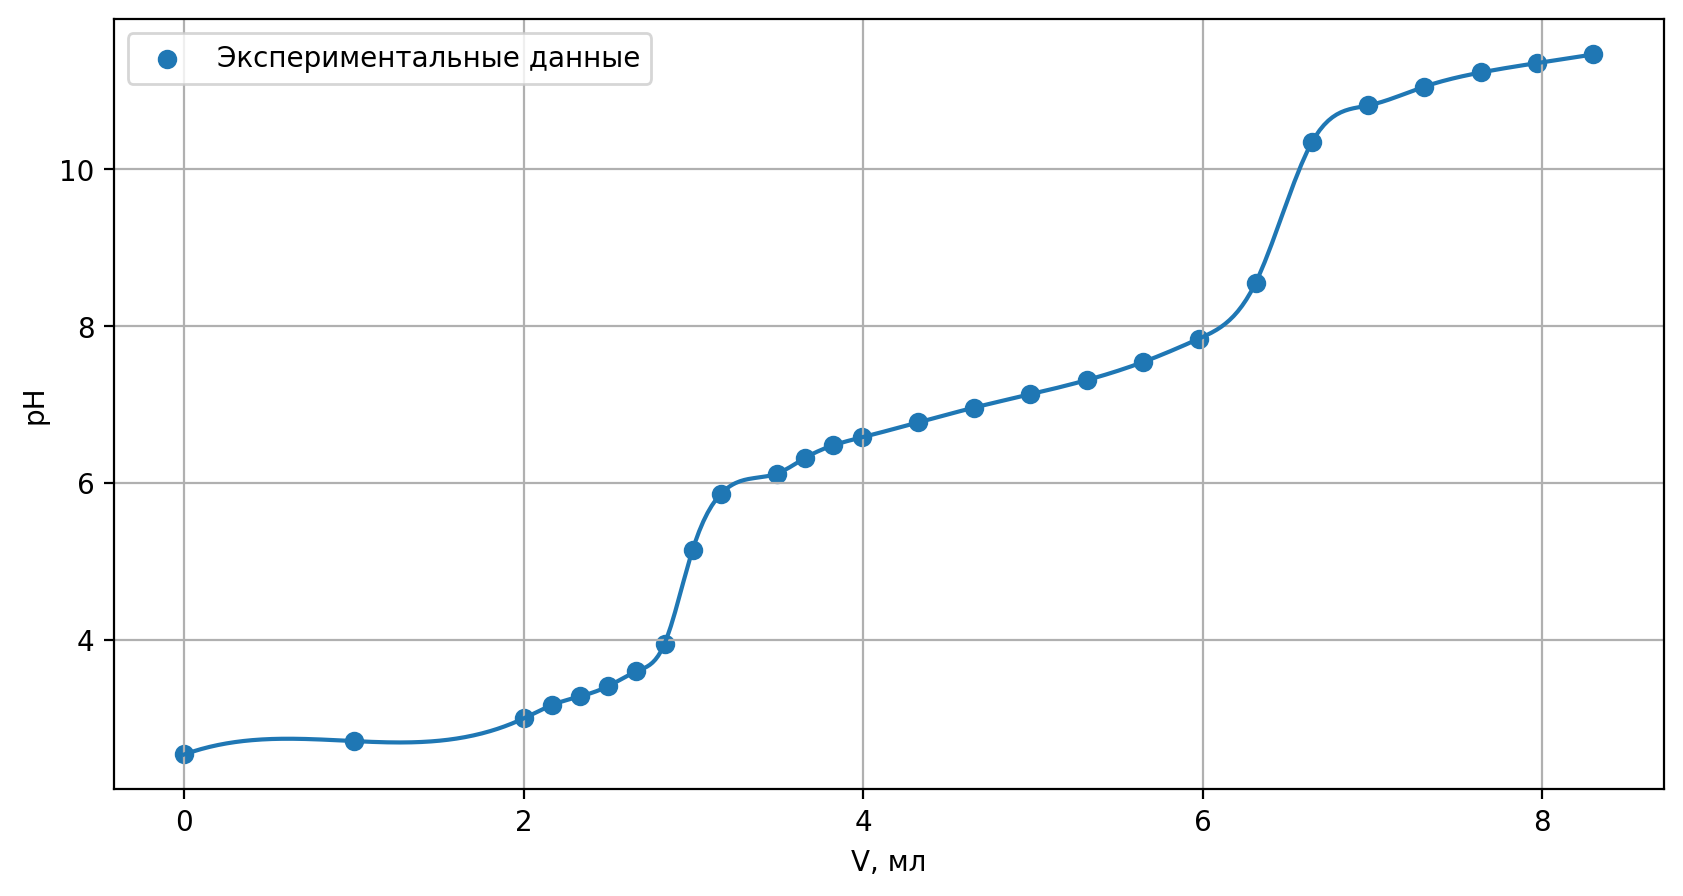

In [68]:
ax = plt.figure(figsize=(10,5), dpi = 200)



spline1 = CubicSpline(df.V, df.pH)
x1 = np.linspace(df.V.min(), df.V.max(), 1000)
plt.plot(x1, spline1(x1))
plt.scatter(df.V, df.pH, label = "Экспериментальные данные")
plt.grid()
plt.xlabel("V, мл")
plt.ylabel("pH")
plt.legend()

tikz_convert(ax,
             clean = True, 
             mktex = True, 
             path = "", 
             filename = "Кривая титрования фосфорной кислоты.tex", 
             caption = "Кривая титрования фосфорной кислоты")



0     0.000000
1     1.000000
2     2.000000
3     2.165789
4     2.331579
5     2.497368
6     2.663158
7     2.828947
8     2.994737
9     3.160526
10    3.492105
11    3.657895
12    3.823684
13    3.989474
14    4.321053
15    4.652632
16    4.984211
17    5.315789
18    5.647368
19    5.978947
20    6.310526
21    6.642105
22    6.973684
23    7.305263
24    7.636842
25    7.968421
Name: V, dtype: float64


(2.911842, 6.1447365000000005)

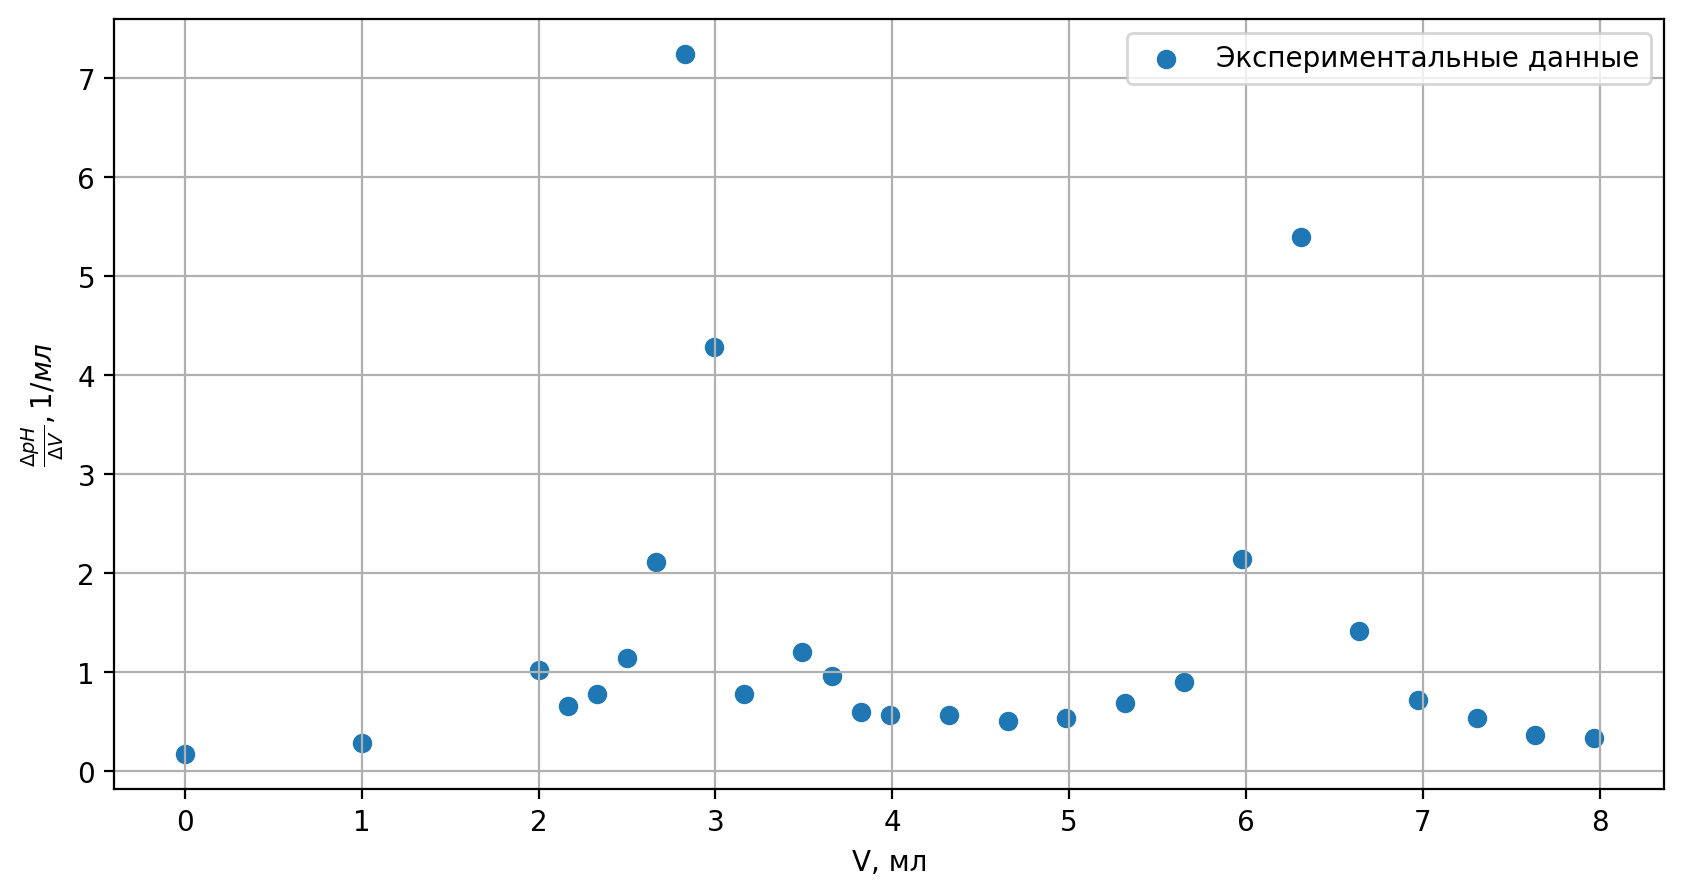

In [69]:
ax = plt.figure(figsize=(10,5), dpi = 200)


dpHdV = [(df.pH[i+1] - df.pH[i])/((df.V[i+1] - df.V[i])) for i in range(len(df)-1)]

#spline1 = CubicSpline(df.V[:-1], dpHdV)
#x1 = np.linspace(df.V[:-1].min(), df.V[:-1].max(), 1000)
#plt.plot(x1, spline1(x1))
plt.scatter(df.V[:-1], dpHdV, label = "Экспериментальные данные")
plt.grid()
plt.xlabel("V, мл")
plt.ylabel("$\\frac{\\Delta pH}{\\Delta V}, 1/мл$")
plt.legend()

print(df.V[:-1])

V_ktt1 = (2.828947 + 2.994737)/2
V_ktt2 = (5.978947 + 6.310526)/2



V_ktt1, V_ktt2

In [70]:
print(df)

      k         V     pH
0     0  0.000000   2.54
1     0  1.000000   2.71
2     0  2.000000   3.00
3     4  2.165789   3.17
4     8  2.331579   3.28
5    12  2.497368   3.41
6    16  2.663158   3.60
7    20  2.828947   3.95
8    24  2.994737   5.15
9    28  3.160526   5.86
10   36  3.492105   6.12
11   40  3.657895   6.32
12   44  3.823684   6.48
13   48  3.989474   6.58
14   56  4.321053   6.77
15   64  4.652632   6.96
16   72  4.984211   7.13
17   80  5.315789   7.31
18   88  5.647368   7.54
19   96  5.978947   7.84
20  104  6.310526   8.55
21  112  6.642105  10.34
22  120  6.973684  10.81
23  128  7.305263  11.05
24  136  7.636842  11.23
25  144  7.968421  11.35
26  152  8.300000  11.46


In [74]:
df['dpH'] = 0  # Создаем столбец с NaN для всех строк
df['dpH'][1:] = [(df.pH[i+1] - df.pH[i]) / (df.V[i+1] - df.V[i]) for i in range(len(df) - 1)]

from tabulate import tabulate 


print(tabulate(format_dataframe(df), 
               tablefmt = "github", 
               headers = ["Количество капель","V, мл","pH", "$\\frac{\Delta pH}{\\Delta V}$, 1/мл"]))

|    |   Количество капель |   V, мл |    pH |   $\frac{\Delta pH}{\Delta V}$, 1/мл |
|----|---------------------|---------|-------|--------------------------------------|
|  0 |                   0 |   0     |  2.54 |                                0     |
|  1 |                   0 |   1     |  2.71 |                                0.17  |
|  2 |                   0 |   2     |  3    |                                0.29  |
|  3 |                   4 |   2.166 |  3.17 |                                1.025 |
|  4 |                   8 |   2.332 |  3.28 |                                0.663 |
|  5 |                  12 |   2.497 |  3.41 |                                0.784 |
|  6 |                  16 |   2.663 |  3.6  |                                1.146 |
|  7 |                  20 |   2.829 |  3.95 |                                2.111 |
|  8 |                  24 |   2.995 |  5.15 |                                7.238 |
|  9 |                  28 |   3.161 |  5.86 |        

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_4258/436249272.py:9: SyntaxWarning: invalid escape sequence '\D'
  headers = ["Количество капель","V, мл","pH", "$\\frac{\Delta pH}{\\Delta V}$, 1/мл"]))
/tmp/ipykernel_4258/436249272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dpH'][1:] = [(df.pH[i+1] - df.pH[i]) / (df.V[i+1] - df.V[i]) for i in range(len(df) - 1)]
/tmp/ipykernel_4258/436249272.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16999999999999993, 0.29000000000000004, 1.0253968253968238, 0.6634920634920638, 0.7841269841269853, 1.1460317460317475, 2.1111111111111094, 7.238095238095231, 4.2825396825396895, 0.7841269841269827, 1.2063492063

<>:39: SyntaxWarning: invalid escape sequence '\D'
<>:39: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_4258/1126386646.py:39: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\\frac{\Delta pH}{\Delta V}$, 1/мл")


Аппроксимирующая функция: f(V) = 0.23 * sin(0.73 * V + -1.45) + 6.83 + -0.55 * sin^2(0.78 * V + -1.98) + -5.93 + 6.67 * exp(-(V - 2.87)^2 / (2 * 0.11^2)) + 4.62 * exp(-(V - 6.27)^2 / (2 * 0.18^2))

```text
\begin{figure}[H]
\centering
[[Дифференциальная кривая титрования фосфорной кислоты.tex]]
\caption{Дифференциальная кривая титрования фосфорной кислоты}
\end{figure}
```


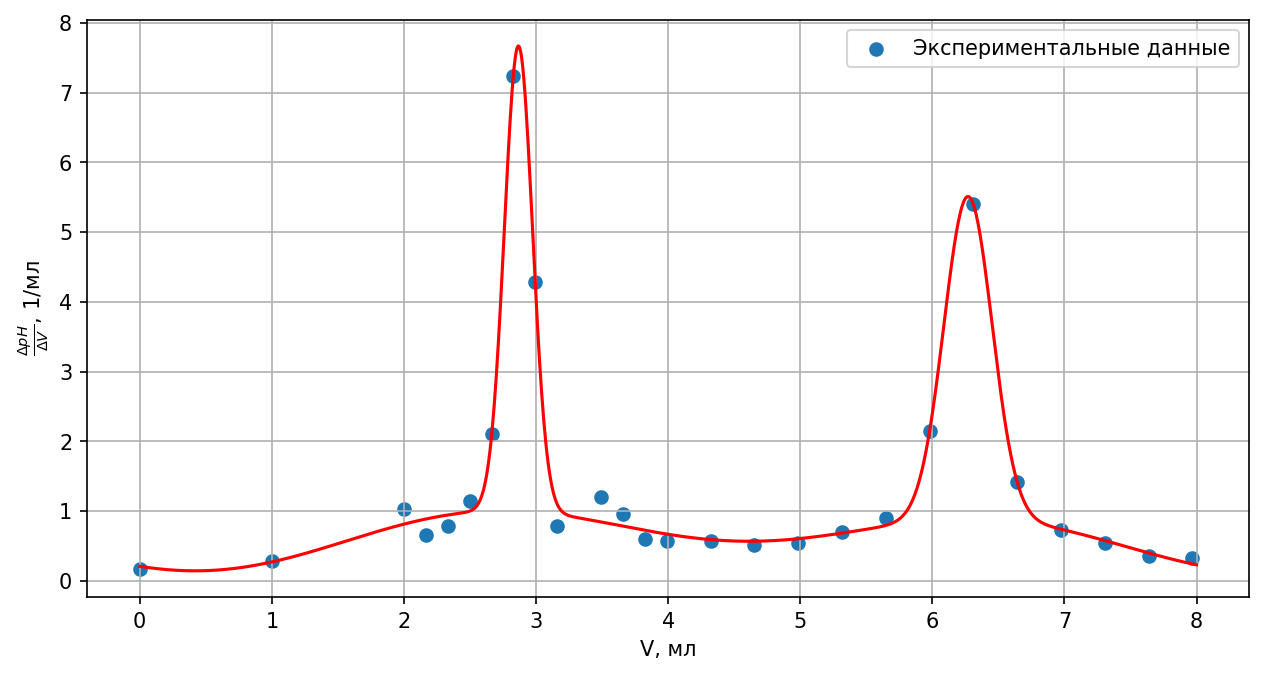

In [26]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Исходные данные (замените на реальные данные)
V = df.V[:-1]
dPH_dV = dpHdV  # ΔpH/ΔV, 1/мл

# Определяем функцию для аппроксимации
def combined_function(V, As, omega, phi, Cs, Bs, omega2, phi2, Ds, A1, Vp1, sigma1, A2, Vp2, sigma2):
    sinusoidal_part = As * np.sin(omega * V + phi) + Cs
    sinusoidal_squared_part = Bs * np.sin(omega2 * V + phi2)**2 + Ds
    gaussian_peak1 = A1 * np.exp(-(V - Vp1)**2 / (2 * sigma1**2))
    gaussian_peak2 = A2 * np.exp(-(V - Vp2)**2 / (2 * sigma2**2))
    return sinusoidal_part + sinusoidal_squared_part + gaussian_peak1 + gaussian_peak2

# Начальные приближения для параметров
initial_guess = [1.0, 0.5, 0.0, 0.5, 1.0, 0.5, 0.0, 0.5, 7.0, 3.0, 0.5, 5.5, 6.0, 0.5]  # [As, omega, phi, Cs, Bs, omega2, phi2, Ds, A1, Vp1, sigma1, A2, Vp2, sigma2]

# Производим подгонку данных
params, covariance = curve_fit(combined_function, V, dPH_dV, p0=initial_guess)

# Получаем оптимальные параметры
As_opt, omega_opt, phi_opt, Cs_opt, Bs_opt, omega2_opt, phi2_opt, Ds_opt, A1_opt, Vp1_opt, sigma1_opt, A2_opt, Vp2_opt, sigma2_opt = params

# Создаем массив значений для построения аппроксимирующей кривой
V_fit = np.linspace(0, 8, 1000)
dPH_dV_fit = combined_function(V_fit, As_opt, omega_opt, phi_opt, Cs_opt, Bs_opt, omega2_opt, phi2_opt, Ds_opt, A1_opt, Vp1_opt, sigma1_opt, A2_opt, Vp2_opt, sigma2_opt)

# Выводим результаты
print(f"Аппроксимирующая функция: f(V) = {As_opt:.2f} * sin({omega_opt:.2f} * V + {phi_opt:.2f}) + {Cs_opt:.2f} + {Bs_opt:.2f} * sin^2({omega2_opt:.2f} * V + {phi2_opt:.2f}) + {Ds_opt:.2f} + {A1_opt:.2f} * exp(-(V - {Vp1_opt:.2f})^2 / (2 * {sigma1_opt:.2f}^2)) + {A2_opt:.2f} * exp(-(V - {Vp2_opt:.2f})^2 / (2 * {sigma2_opt:.2f}^2))")

# Построение графика

ax = plt.figure(figsize=(10,5), dpi = 150)
plt.plot(V_fit, dPH_dV_fit, 'r-')
plt.scatter(V, dPH_dV, label="Экспериментальные данные")
plt.xlabel("V, мл")
plt.ylabel("$\\frac{\Delta pH}{\Delta V}$, 1/мл")
plt.legend()
plt.grid(True)


tikz_convert(ax,
             clean = False, 
             mktex = True, 
             path = "", 
             filename = "Дифференциальная кривая титрования фосфорной кислоты.tex", 
             caption = "Дифференциальная кривая титрования фосфорной кислоты")